1. Activate Kaggle

In [1]:
! chmod 600 /content/kaggle.json

2. Download dataset from Kaggle

In [2]:
! KAGGLE_CONFIG_DIR=/content/ kaggle datasets download -d ameyamote030/einterface-image-dataset

 99% 793M/801M [00:20<00:00, 27.5MB/s]
100% 801M/801M [00:20<00:00, 40.8MB/s]


3. Make folder for dataset files

In [3]:
!mkdir /content/Emotions 

4. Unzip file which has been downloaded from Kaggle  

In [4]:
import zipfile
zip_file = zipfile.ZipFile('/content/einterface-image-dataset.zip')
zip_file.extractall('/content/Emotions')

5. Import library and modules

In [25]:
import os
import glob as gb
import pandas as pd
from tensorflow import keras

from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import Dense

6. Define dataset train and test folder directory
7. Define batch size

In [6]:
TRAIN = '/content/Emotions/eINTERFACE_2021_Image/train'
TEST = '/content/Emotions/eINTERFACE_2021_Image/test'
BATCH_SIZE = 64

8. Count dataset files each folders

In [8]:
for folder in os.listdir(TRAIN):
  files = gb.glob(pathname= str(TRAIN + '/' + folder + '/*.jpg'))
  print(f'For Training Data, found {len(files)} in folder {folder}')

for folder in os.listdir(TEST):
  files = gb.glob(pathname= str(TEST + '/' + folder + '/*.jpg'))
  print(f'For Testing Data, found {len(files)} in folder {folder}')

For Training Data, found 1896 in folder Anger
For Training Data, found 1922 in folder Surprise
For Training Data, found 1922 in folder Happiness
For Training Data, found 1922 in folder Fear
For Training Data, found 1891 in folder Disgust
For Training Data, found 1922 in folder Sadness
For Testing Data, found 237 in folder Anger
For Testing Data, found 241 in folder Surprise
For Testing Data, found 241 in folder Happiness
For Testing Data, found 241 in folder Fear
For Testing Data, found 237 in folder Disgust
For Testing Data, found 241 in folder Sadness


9. Show sample image from random files

Image Shape (416, 416, 3)
Image Shape (416, 416, 3)
Image Shape (416, 416, 3)
Image Shape (416, 416, 3)
Image Shape (416, 416, 3)
Image Shape (416, 416, 3)
Image Shape (416, 416, 3)
Image Shape (416, 416, 3)
Image Shape (416, 416, 3)
Image Shape (416, 416, 3)
Image Shape (416, 416, 3)
Image Shape (416, 416, 3)
Image Shape (416, 416, 3)
Image Shape (416, 416, 3)
Image Shape (416, 416, 3)
Image Shape (416, 416, 3)
Image Shape (416, 416, 3)
Image Shape (416, 416, 3)


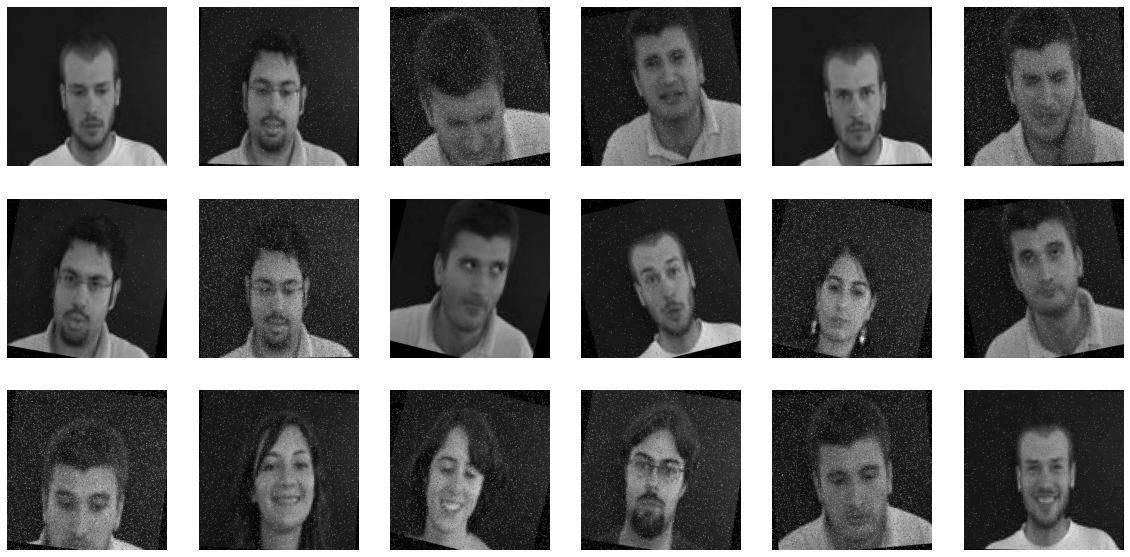

In [16]:
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def view_random(target_dir, target_class):
  target_folder = target_dir + target_class
  random_image = random.sample(os.listdir(target_folder), 1)
  img = mpimg.imread(target_folder + '/' + random_image[0])
  plt.imshow(img)
  plt.axis('off')
  print(f'Image Shape {img.shape}')

  return img

class_names = ['Anger','Disgust','Fear','Happiness','Sadness','Surprise']
plt.figure(figsize=(20,10))
for i in range(18):
  plt.subplot(3,6,i+1)
  class_name = random.choice(class_names)
  img = view_random(target_dir ='/content/Emotions/eINTERFACE_2021_Image/train/',target_class=class_name)

10. Preprocessing dataset using image data generator

In [17]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1/255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1/255)

training_set = train_datagen.flow_from_directory(TRAIN,
                                                 target_size = (128,128),
                                                 batch_size = BATCH_SIZE,
                                                 class_mode = 'categorical')
testing_set = test_datagen.flow_from_directory(TEST,
                                               target_size = (128,128),
                                               batch_size = BATCH_SIZE,
                                               class_mode = 'categorical')

Found 11475 images belonging to 6 classes.
Found 1438 images belonging to 6 classes.


11. Create model
12. Compile model
13. Show summary from model created

In [34]:
cnn_model = Sequential([Conv2D(16,(3,3), activation='relu', input_shape=(128,128,3)),
                        MaxPooling2D(2,2),
                        Dropout(rate=0.2),
                        Conv2D(32,(3,3), activation='relu'),
                        MaxPooling2D(2,2),
                        Dropout(rate=0.2),
                        Flatten(),
                        Dropout(rate=0.2),
                        Dense(128, activation='relu'),
                        Dropout(rate=0.2),
                        Dense(6, activation='softmax')])

cnn_model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
cnn_model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_26 (Conv2D)          (None, 126, 126, 16)      448       
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 63, 63, 16)       0         
 g2D)                                                            
                                                                 
 dropout_30 (Dropout)        (None, 63, 63, 16)        0         
                                                                 
 conv2d_27 (Conv2D)          (None, 61, 61, 32)        4640      
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 30, 30, 32)       0         
 g2D)                                                            
                                                                 
 dropout_31 (Dropout)        (None, 30, 30, 32)       

14. Train model

In [35]:
history = cnn_model.fit(training_set,
                        epochs = 50,
                        validation_data = testing_set)

Epoch 1/50
180/180 [==============================] - 93s 511ms/step - loss: 1.8095 - accuracy: 0.1752 - val_loss: 1.7682 - val_accuracy: 0.2497
Epoch 2/50
180/180 [==============================] - 91s 506ms/step - loss: 1.6874 - accuracy: 0.2909 - val_loss: 1.5495 - val_accuracy: 0.3651
Epoch 3/50
180/180 [==============================] - 91s 507ms/step - loss: 1.5268 - accuracy: 0.3613 - val_loss: 1.4410 - val_accuracy: 0.3887
Epoch 4/50
180/180 [==============================] - 91s 507ms/step - loss: 1.4050 - accuracy: 0.4121 - val_loss: 1.3919 - val_accuracy: 0.3957
Epoch 5/50
180/180 [==============================] - 92s 509ms/step - loss: 1.3280 - accuracy: 0.4453 - val_loss: 1.3242 - val_accuracy: 0.4409
Epoch 6/50
180/180 [==============================] - 91s 507ms/step - loss: 1.2760 - accuracy: 0.4687 - val_loss: 1.1899 - val_accuracy: 0.5097
Epoch 7/50
180/180 [==============================] - 91s 506ms/step - loss: 1.2248 - accuracy: 0.4934 - val_loss: 1.1598 - val_ac

15. Show accuracy from the model 

In [41]:
eval = cnn_model.evaluate(testing_set)
print(f'Accuracy = {eval[1]}')

23/23 [==============================] - 5s 237ms/step - loss: 0.5882 - accuracy: 0.7782
Accuracy = 0.7781640887260437


16. Plot accuracy and loss

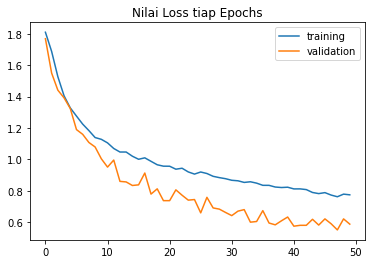

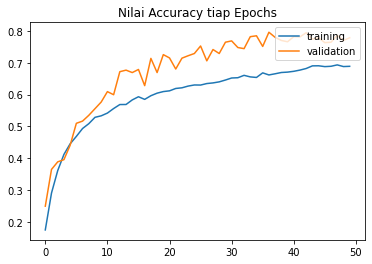

In [36]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Nilai Loss tiap Epochs')
plt.legend(['training', 'validation'], loc='upper right')
plt.show()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Nilai Accuracy tiap Epochs')
plt.legend(['training', 'validation'], loc='upper right')
plt.show()

17. Save model

In [43]:
cnn_model.save('emotion.h5')

18. Test model performance using random files

In [66]:
import cv2
from PIL import Image
import numpy as np

model_path = 'emotion.h5'
loaded_model = keras.models.load_model(model_path)

test_image = '/content/Emotions/eINTERFACE_2021_Image/test/Anger/myvideo_frames100_jpg.rf.f0d1fe28da50a9799d4f98db28761b04.jpg'
image = cv2.imread(test_image)

image_fromarray = Image.fromarray(image, 'RGB')
resize_image = image_fromarray.resize((128,128))
expand_input = np.expand_dims(resize_image, axis=0)
input_data = np.array(expand_input)
input_data = input_data/255

pred = loaded_model.predict(input_data)
result = pred.argmax()
hasil = training_set.class_indices
key_list = list(hasil)
prediksi = key_list[result]
print(f'Hasil Prediksi adalah {prediksi}')

Hasil Prediksi adalah Anger
